In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data = pd.read_csv('data/train.csv')
print(data.shape)
data.head()

(12701, 12)


,Open_time,Open,High,Low,Close,Volume,QV,NOT,TBB,TBQ,Volatility,target
0,2021-05-13 09:00:00,1.6625,1.6800,1.6623,1.6737,2878032.99,4.821304e+06,5125,1702161.28,2.851617e+06,0.673684,0
1,2021-05-13 09:05:00,1.6738,1.6790,1.6686,1.6733,2723854.15,4.558141e+06,4318,1516726.12,2.538139e+06,-0.029872,0
2,2021-05-13 09:10:00,1.6734,1.6749,1.6496,1.6514,3653708.06,6.075417e+06,5561,1625405.03,2.702822e+06,-1.314689,1
3,2021-05-13 09:15:00,1.6515,1.6708,1.6500,1.6693,3313388.75,5.505110e+06,5374,1797877.23,2.987432e+06,1.077808,0
4,2021-05-13 09:20:00,1.6690,1.6728,1.6587,1.6668,3478711.17,5.794350e+06,5799,1736515.81,2.892649e+06,-0.131815,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12701 entries, 0 to 12700
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open_time   12701 non-null  object 
 1   Open        12701 non-null  float64
 2   High        12701 non-null  float64
 3   Low         12701 non-null  float64
 4   Close       12701 non-null  float64
 5   Volume      12701 non-null  float64
 6   QV          12701 non-null  float64
 7   NOT         12701 non-null  int64  
 8   TBB         12701 non-null  float64
 9   TBQ         12701 non-null  float64
 10  Volatility  12701 non-null  float64
 11  target      12701 non-null  int64  
dtypes: float64(9), int64(2), object(1)
memory usage: 1.2+ MB


- Open: Open price of the candle, (price of the asset at the beggining of the 5 minutes)
- High: Higher price of the asset in the 5 minutes period
- Low: Lower price of the asset in the 5 minutes period
- Close: Close price of the candle (price of the asset at the end of the 5 minutes)
- Volume: Amount of cryptocurrecies transactionated in the 5 minutes timeframe
- QV: Quote asset Volume, amount of USD transactionated in the 5 minutes timeframe
- NOT: Number Of Trades, this mean the total number of transactions done in the 5 minutes timeframe
- TBB: (Taker Buy Base) Amount of crypto bought directly with a market order
- TBQ: (Taker Buy Quote) Amount of USDT bought directly with a maket order
- Volatility: Is the relative change between the close price and the open price of each timeframe [%]

## No null values, floats and ints

In [6]:
data.duplicated().sum()

0

## Time-series analysis? Or feature engineering (add substractions and such as features)

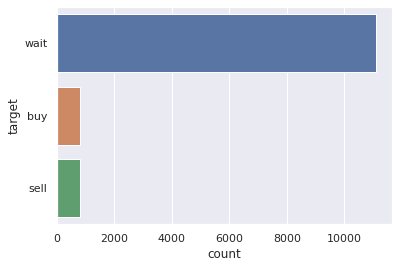

In [7]:
sns.countplot(data=data, y='target')
plt.yticks(ticks=[0, 1, 2], labels=['wait', 'buy', 'sell']);

## Unbalanced!!

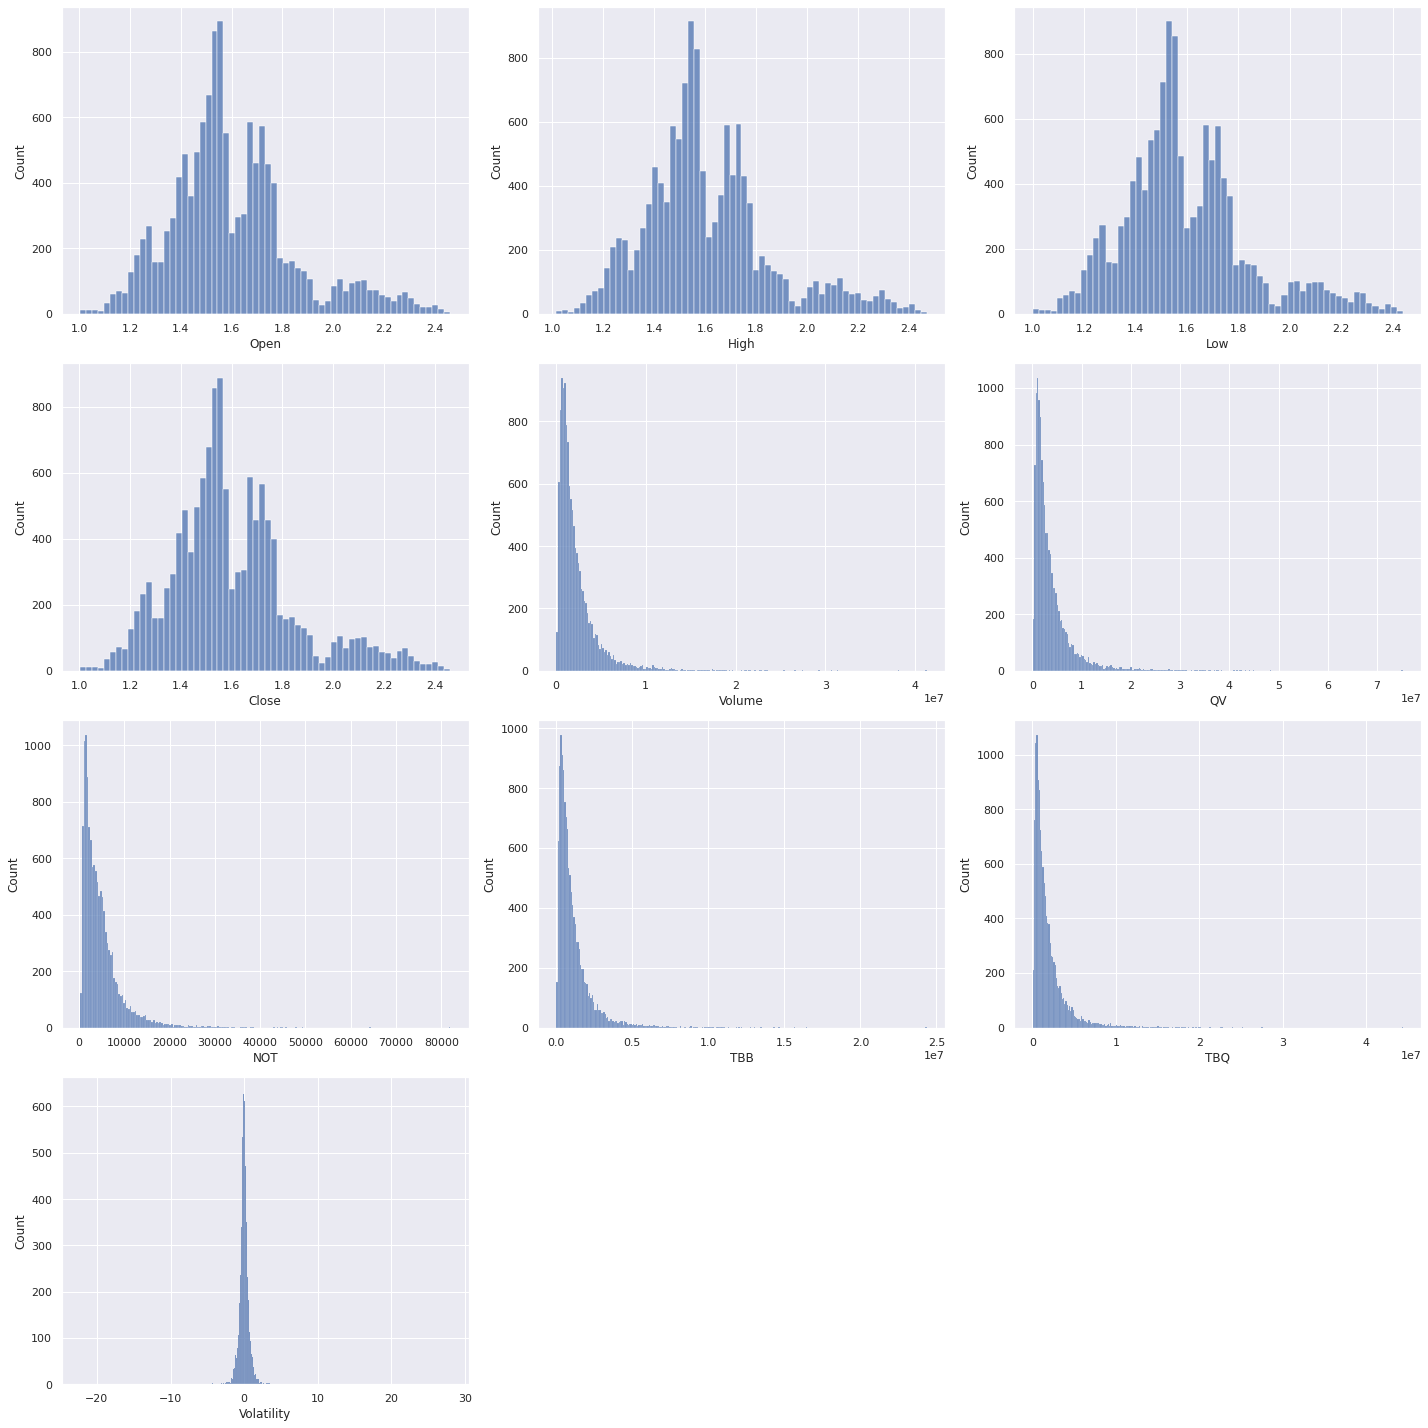

In [8]:
fig = plt.figure(figsize=(20, 20))

variables = data.columns.drop(['Open_time', 'target'])
n_rows = 4
n_cols = int(np.ceil(variables.shape[0] / n_rows))

for i, var in enumerate(variables):
    var_type = data[var].dtypes
    ax = fig.add_subplot(n_rows, n_cols, i+1)
    sns.histplot(x=var, data=data, ax=ax)
  
plt.tight_layout()

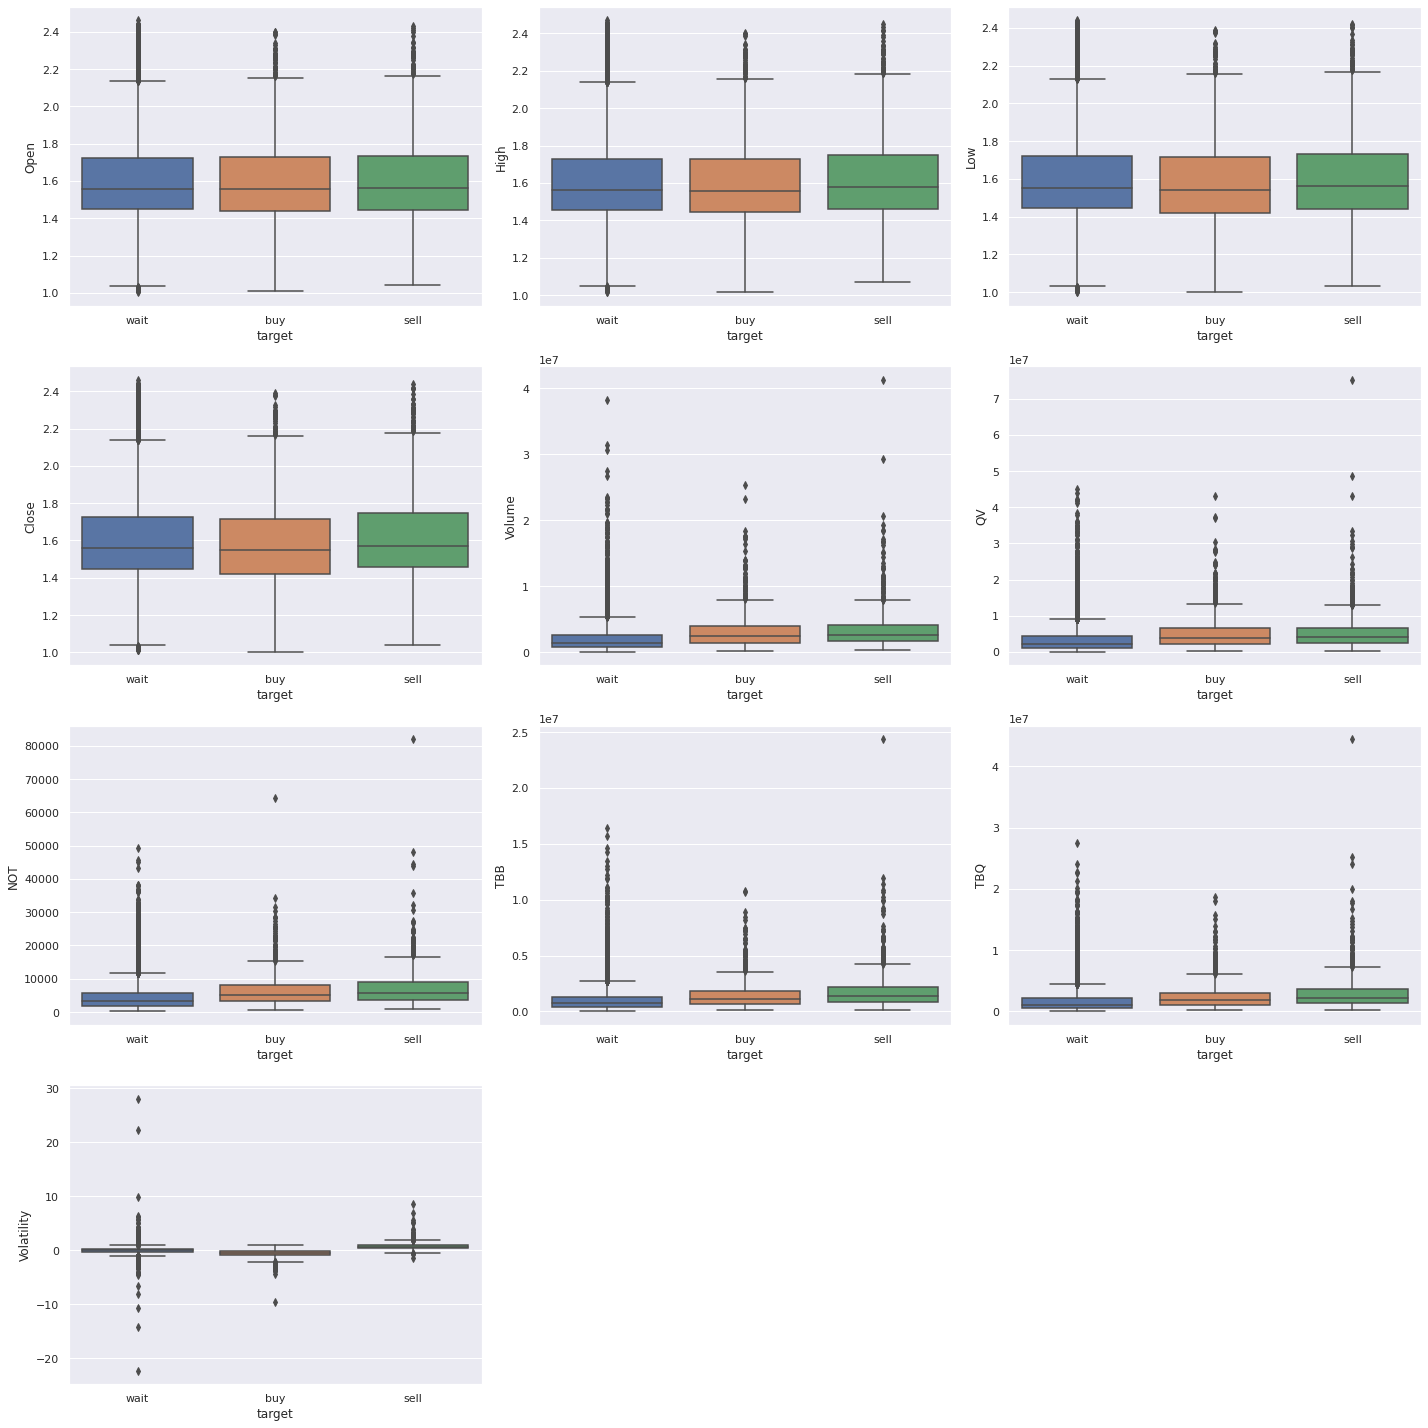

In [9]:
fig = plt.figure(figsize=(20, 20))

variables = data.columns.drop(['Open_time', 'target'])
n_rows = 4
n_cols = int(np.ceil(variables.shape[0] / n_rows))

for i, var in enumerate(variables):
    var_type = data[var].dtypes
    ax = fig.add_subplot(n_rows, n_cols, i+1)
    sns.boxplot(x='target', y=var, data=data, ax=ax)
    plt.xticks(ticks=[0, 1, 2], labels=['wait', 'buy', 'sell'])

plt.tight_layout()

- Open doesn't seem to affect much to the decision of waiting, buying or selling, but the other variables do

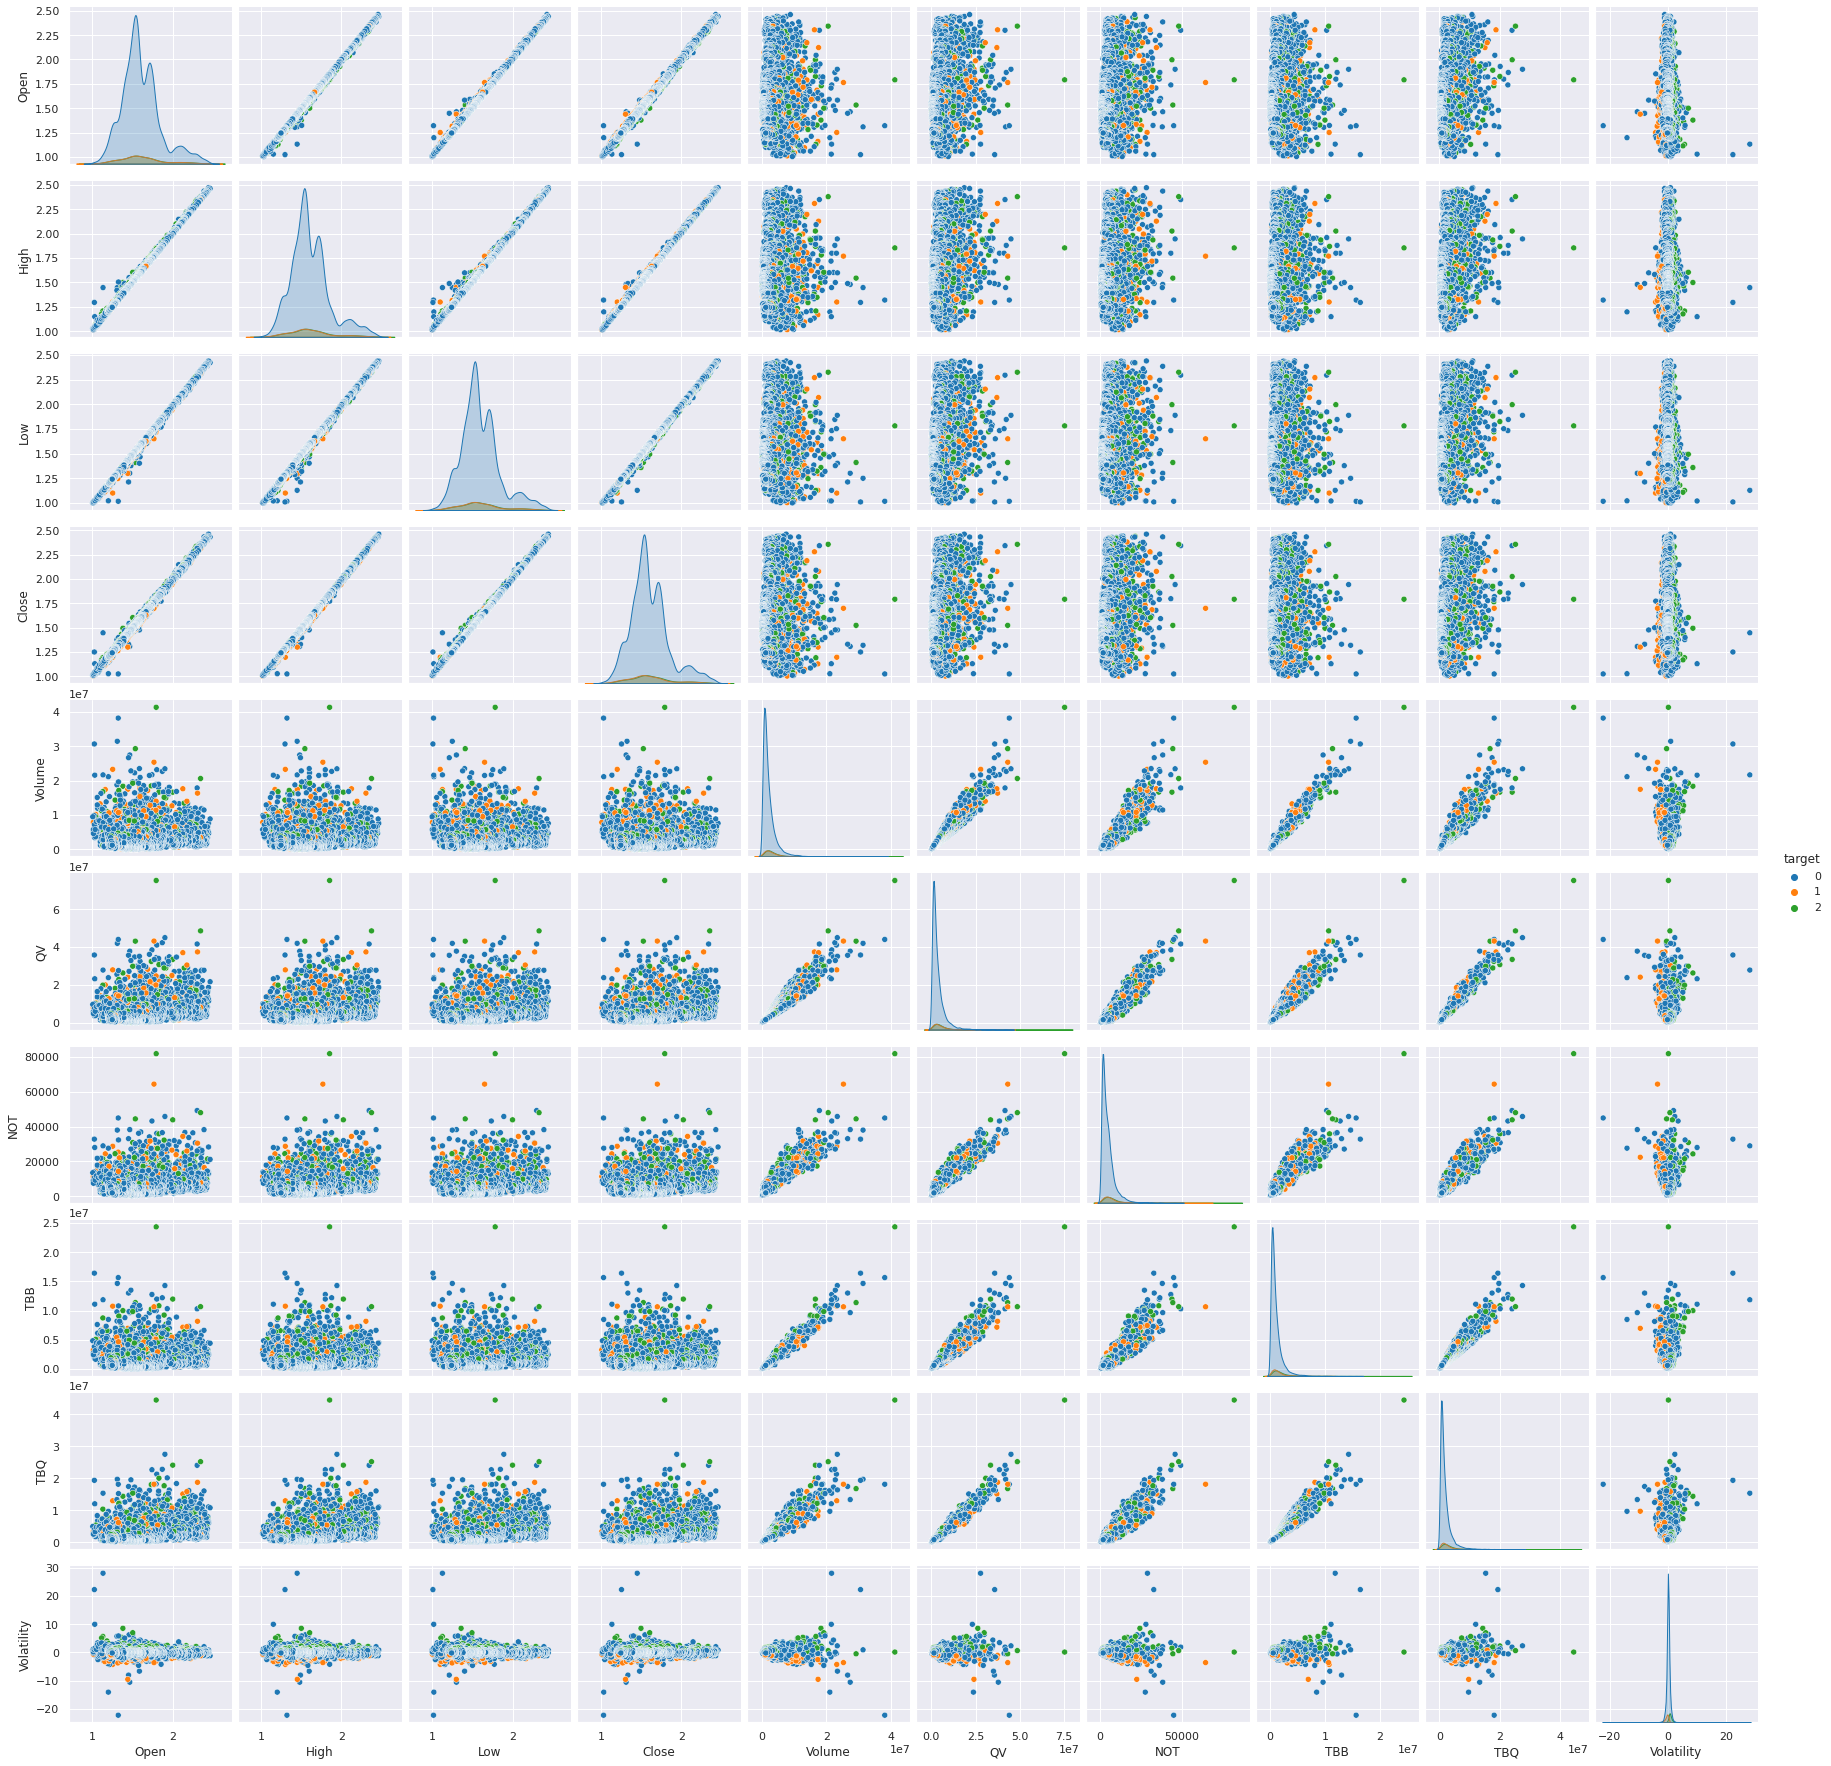

In [12]:
sns.pairplot(data, hue='target', palette='tab10')

- There is collinearity between some features:
    - Open, High, Low and Close are highly correlated
    - Volume, QV, NOT, tbb and TBQ are moderately correlated 


Distribution of variable by target value, normalized:

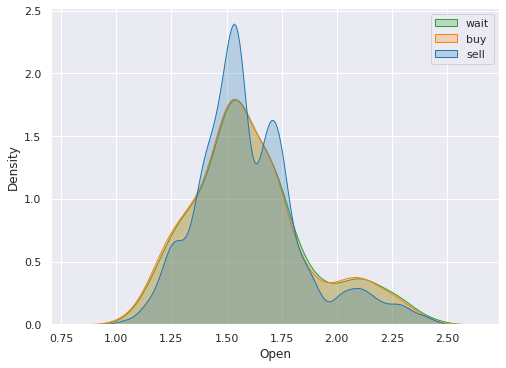

In [26]:
fig = plt.figure(figsize=(20, 20))

variables = data.columns.drop(['Open_time', 'target'])
n_rows = 4
n_cols = int(np.ceil(variables.shape[0] / n_rows))

for i, var in enumerate(variables):
    var_type = data[var].dtypes
    ax = fig.add_subplot(n_rows, n_cols, i+1)
    sns.kdeplot(data=data, x=var, hue='target', ax=ax, common_norm=False, shade=True, palette='tab10')
    plt.legend(labels=['wait', 'buy', 'sell'])
    #plt.xticks(ticks=[0, 1, 2], labels=['wait', 'buy', 'sell'])
    break

plt.tight_layout()
